In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = [
    'Number_pregnant', 'Glucose_concentration',
    'Blood_pressure', 'Triceps',
    'Insulin', 'BMI', 'Pedigree'
]

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

## hash bucket vs volcabulary list

In [9]:
# dynamic
assigned_group = tf.feature_column.categorical_column_with_hash_bucket(
    'Group', hash_bucket_size=10
)

In [10]:
# fixed
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
    'Group', ['A', 'B', 'C', 'D']
)

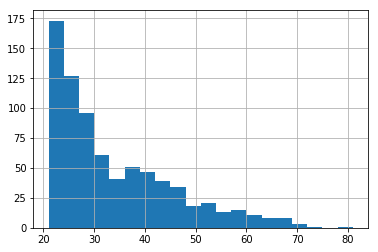

In [11]:
diabetes['Age'].hist(bins=20)

In [12]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [13]:
feat_cols = [
    num_preg,
    plasma_gluc,
    dias_press,
    tricep,
    insulin,
    bmi,
    diabetes_pedigree,
    assigned_group,
    age_bucket
]

In [14]:
# Train test split

In [15]:
x_data = diabetes.drop('Class', axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [16]:
labels = diabetes['Class']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [19]:
input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_train,
    y=y_train,
    batch_size=10,
    num_epochs=1000,
    shuffle=True
)

In [20]:
model = tf.estimator.LinearClassifier(
    feature_columns=feat_cols, n_classes=2
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/0q/36d1fl0d3n1537ld143pvb0r0000gn/T/tmppcoskvba', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x112dc9f98>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/0q/36d1fl0d3n1537ld143pvb0r0000gn/T/tmppcoskvba/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 355.576
INFO:tensorflow:loss = 3.786277, step = 101 (0.282 sec)
INFO:tensorflow:global_step/sec: 492.625
INFO:tensorflow:loss = 5.286521, step = 201 (0.203 sec)
INFO:tensorflow:global_step/sec: 497.817
INFO:tensorflow:loss = 6.3319893, step = 301 (0.201 sec)
INFO:tensorflow:global_step/sec: 479.182
INFO:tensorflow:loss = 7.5166388, step = 401 (0.208 sec)
INFO:tensorflow:global_step/sec: 477.422
INFO:tensorflow:loss = 3.7130928, step = 501 (0.210 sec)
INFO:tensorflow:global_step/sec: 515.624
INFO:tensorflow:loss = 7.3830814, step = 601 (0.194 sec)
INFO:tensorflow:global_step/sec: 537.493
INFO:tensorflow:loss = 6.1117377, step = 701 (0.186 sec)
INFO:tensorflow:global_step/sec: 364.984
INFO:tensorflow:loss = 4.4368925, step = 801 (0.275 sec)
INFO:tensorfl

In [22]:
train_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_test,
    y=y_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False
)

In [23]:
results = model.evaluate(train_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-15-10:19:28
INFO:tensorflow:Restoring parameters from /var/folders/0q/36d1fl0d3n1537ld143pvb0r0000gn/T/tmppcoskvba/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-15-10:19:29
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.7958436, auc_precision_recall = 0.6347047, average_loss = 0.52979416, global_step = 1000, label/mean = 0.35064936, loss = 5.0992684, prediction/mean = 0.35423818


In [24]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7958436,
 'auc_precision_recall': 0.6347047,
 'average_loss': 0.52979416,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0992684,
 'prediction/mean': 0.35423818}

In [25]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False
)

In [26]:
predictions = model.predict(pred_input_func)

In [27]:
list(predictions)

INFO:tensorflow:Restoring parameters from /var/folders/0q/36d1fl0d3n1537ld143pvb0r0000gn/T/tmppcoskvba/model.ckpt-1000


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5168047], dtype=float32),
  'logits': array([0.06724393], dtype=float32),
  'probabilities': array([0.4831954, 0.5168047], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5916067], dtype=float32),
  'logits': array([0.3706113], dtype=float32),
  'probabilities': array([0.40839332, 0.5916067 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.35567227], dtype=float32),
  'logits': array([-0.59419775], dtype=float32),
  'probabilities': array([0.6443277 , 0.35567227], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.33107373], dtype=float32),
  'logits': array([-0.70333266], dtype=float32),
  'probabilities': array([0.66892624, 0.33107373], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=obj

## DNN models

In [28]:
embedded_group_col = tf.feature_column.embedding_column(
    assigned_group, dimension=4
)

In [29]:
feat_cols = [
    num_preg,
    plasma_gluc,
    dias_press,
    tricep,
    insulin,
    bmi,
    diabetes_pedigree,
    embedded_group_col, # cannot use the same volcabulary list
    age_bucket
]

In [30]:
input_func = tf.estimator.inputs.pandas_input_fn(
    X_train,
    y_train,
    batch_size=10,
    num_epochs=1000,
    shuffle=True
)

In [31]:
dnn_model = tf.estimator.DNNClassifier(
    hidden_units=[10, 10, 10],
    feature_columns=feat_cols,
    n_classes=2
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/0q/36d1fl0d3n1537ld143pvb0r0000gn/T/tmp4k9j_5sr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x113150c50>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [32]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/0q/36d1fl0d3n1537ld143pvb0r0000gn/T/tmp4k9j_5sr/model.ckpt.
INFO:tensorflow:loss = 7.341258, step = 1
INFO:tensorflow:global_step/sec: 340.34
INFO:tensorflow:loss = 5.8578243, step = 101 (0.295 sec)
INFO:tensorflow:global_step/sec: 383.049
INFO:tensorflow:loss = 6.310588, step = 201 (0.262 sec)
INFO:tensorflow:global_step/sec: 387.196
INFO:tensorflow:loss = 4.524659, step = 301 (0.258 sec)
INFO:tensorflow:global_step/sec: 404.212
INFO:tensorflow:loss = 4.865909, step = 401 (0.250 sec)
INFO:tensorflow:global_step/sec: 413.842
INFO:tensorflow:loss = 4.726378, step = 501 (0.240 sec)
INFO:tensorflow:global_step/sec: 405.315
INFO:tensorflow:loss = 2.1080317, step = 601 (0.245 sec)
INFO:tensorflow:global_step/sec: 433.695
INFO:tensorflow:loss = 2.0961351, step = 701 (0.230 sec)
INFO:tensorflow:global_step/sec: 477.977
INFO:tensorflow:loss = 4.5503955, step = 801 (0.211 sec)
INFO:tensorflow:

In [33]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
    X_test,
    y_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False
)

In [34]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-15-10:19:41
INFO:tensorflow:Restoring parameters from /var/folders/0q/36d1fl0d3n1537ld143pvb0r0000gn/T/tmp4k9j_5sr/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-15-10:19:42
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.64935064, auc = 0.8299999, auc_precision_recall = 0.6842793, average_loss = 0.48504514, global_step = 1000, label/mean = 0.35064936, loss = 4.6685596, prediction/mean = 0.39057824


{'accuracy': 0.76623374,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8299999,
 'auc_precision_recall': 0.6842793,
 'average_loss': 0.48504514,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.6685596,
 'prediction/mean': 0.39057824}